## Amazon Fine Food Reviews
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/colab/Big data/Reviews_withURL.csv")
df

Mounted at /content/drive


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProductURL
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,https://www.amazon.com/dp/B001E4KFG0
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,https://www.amazon.com/dp/B00813GRG4
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,https://www.amazon.com/dp/B000LQOCH0
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,https://www.amazon.com/dp/B000UA0QIQ
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,https://www.amazon.com/dp/B006K2ZZ7K
...,...,...,...,...,...,...,...,...,...,...,...,...
568422,568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,https://www.amazon.com/dp/B001EO7N10
568423,568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,https://www.amazon.com/dp/B003S1WTCU
568424,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",https://www.amazon.com/dp/B004I613EE
568425,568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,https://www.amazon.com/dp/B004I613EE


## Score Distribution

5    363122
4     80655
1     52268
3     42638
2     29744
Name: Score, dtype: int64


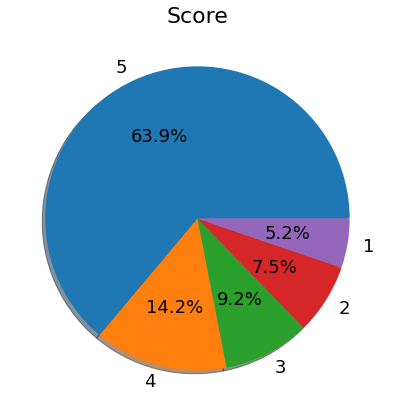

In [ ]:
score = df['Score'].value_counts()
print(score)
fig ,ax = plt.subplots(figsize=(10,7))
ax.pie(score,labels=['5','4','3','2','1'],
    autopct='%.1f%%', # 比例格式
    shadow = True,
    textprops = {'fontsize':18})
ax.set_title("Score",fontsize=22)
#ax.legend(score, loc=6, fontsize='large')
plt.show()

## Number of reviews for each user

In [ ]:
user_review_count = df.groupby(['UserId'])['Summary'].aggregate('count').reset_index().sort_values('Summary', ascending=False, axis=0)
user_review_count.columns = ['UserId', 'review']
user_review_count = user_review_count[:10] #top 10.
user_review_count

,UserId,review
182009,A3OXHLG6DIBRW8,448
65585,A1YUL9PCJR3JTY,421
252272,AY12DBB0U420B,389
82917,A281NPSIMI1C2R,365
66161,A1Z54EM24Y40LL,256
55735,A1TMAVN4CEM8U8,204
110861,A2MUGFV2TDQ47K,201
191280,A3TVZM3ZIXG8YW,199
183159,A3PJZ8TU8FDQ1K,178
238450,AQQLWCMRNDFGI,176


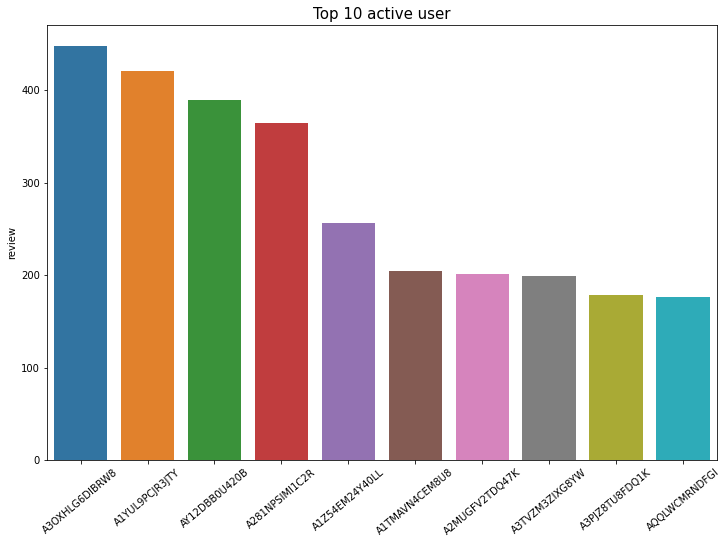

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.barplot(np.arange(10),user_review_count.review)
plt.xticks(np.arange(10),user_review_count.UserId,fontsize=10,rotation=40)
plt.ylabel='count'
plt.title('Top 10 active user',fontsize=15)
plt.show()

## Number of reviews for each product

In [ ]:
product_review_count = df.groupby(['ProductId'])['Score'].aggregate('count').reset_index().sort_values('Score', ascending= False, axis=0)
product_review_count.columns = ['ProductId', 'counts']
product_review_count = product_review_count[:10]
product_review_count

,ProductId,counts
71170,B007JFMH8M,913
42263,B002QWP89S,632
42264,B002QWP8H0,632
42257,B002QWHJOU,632
37898,B0026RQTGE,632
46205,B003B3OOPA,623
28624,B001EO5Q64,567
20497,B000VK8AVK,564
71327,B007M83302,564
37794,B0026KNQSA,564


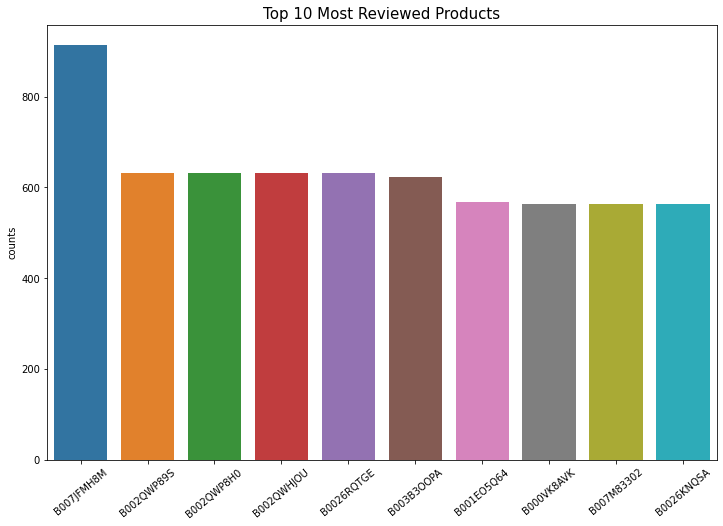

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.barplot(np.arange(10),product_review_count.counts)
plt.xticks(np.arange(10),product_review_count.ProductId,fontsize=10,rotation=40)
plt.ylabel='count'
plt.title('Top 10 Most Reviewed Products',fontsize=15)
plt.show()

## Total score for each product

In [ ]:
Product_score=df.groupby(['ProductId'])['Score'].aggregate('sum').reset_index().sort_values('Score', ascending= False, axis=0)
Product_score.columns = ['ProductId', 'total_score']
score = Product_score[:10]
score

,ProductId,total_score
71170,B007JFMH8M,4184
46205,B003B3OOPA,2953
42264,B002QWP8H0,2900
37898,B0026RQTGE,2900
42257,B002QWHJOU,2900
42263,B002QWP89S,2900
28624,B001EO5Q64,2691
16945,B000NMJWZO,2646
37798,B0026KPDG8,2431
23309,B0013NUGDE,2431


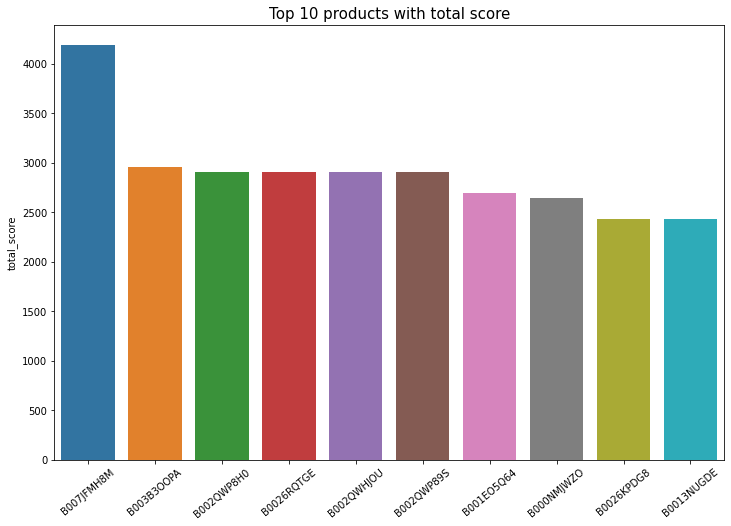

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.barplot(np.arange(10),score.total_score)
plt.xticks(np.arange(10),Product_score.ProductId,fontsize=10,rotation=40)
plt.ylabel='total score'
plt.title('Top 10 products with total score',fontsize=15)
plt.show()

## Mean score for each products

In [ ]:
mean_sorce=df.groupby(['ProductId'])['Score'].aggregate('mean').reset_index().sort_values('Score', ascending=False, axis=0)
mean_sorce.columns = ['ProductId','means']
mean_sorce= mean_sorce[:10]
mean_sorce

,ProductId,means
0,141278509X,5.0
42071,B002PE15WG,5.0
42054,B002P9QRCO,5.0
42057,B002PA1KW0,5.0
42062,B002PA7466,5.0
42064,B002PAHIWQ,5.0
42065,B002PAJFGS,5.0
42066,B002PALD4K,5.0
42067,B002PANI1G,5.0
42070,B002PDYN44,5.0


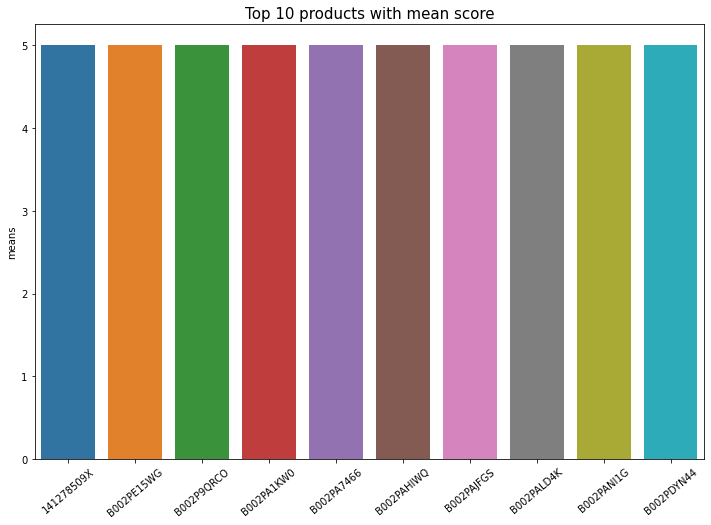

In [ ]:
plt.figure(figsize=(12,8))
plot = sns.barplot(np.arange(10), mean_sorce.means)
plt.xticks(np.arange(10),mean_sorce.ProductId,fontsize=10,rotation=40)
plt.ylabel='total score'
plt.title('Top 10 products with mean score',fontsize=15)
plt.show()